In [ ]:
#MULTIPLE LINEAR REGRESSION

In [ ]:
#Assignment Task:
#Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
#Tasks:
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [3]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
X=df.iloc[:,1:]
Y=df[df.columns[[0]]]

In [6]:
# Finding outliers

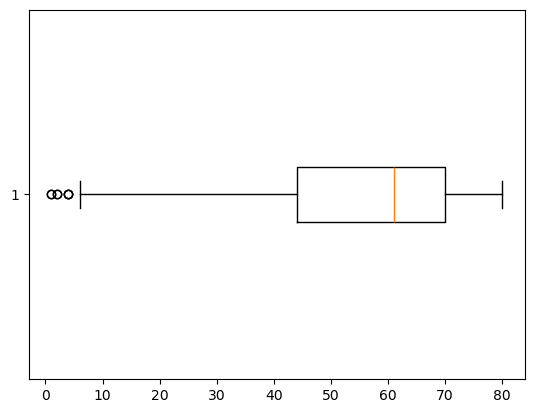

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age_08_04'],vert= False)
plt.show()

In [8]:
import numpy as np
q1=np.percentile(df['Age_08_04'],25)
q2=np.percentile(df['Age_08_04'],50)
q3=np.percentile(df['Age_08_04'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")


44.0 61.0 70.0
IQR is 26.0
upper whisker length is 109.0
lower whisker length is 5.0


In [9]:
len(df[df['Age_08_04']<lw])

7

In [10]:
df.loc[df['Age_08_04']<lw,'Age_08_04']=lw

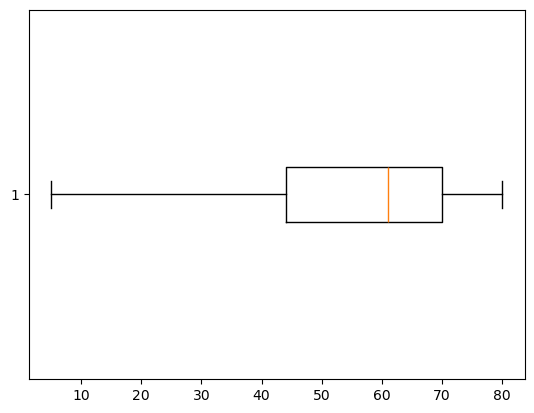

In [11]:
plt.boxplot(df['Age_08_04'],vert= False)
plt.show()

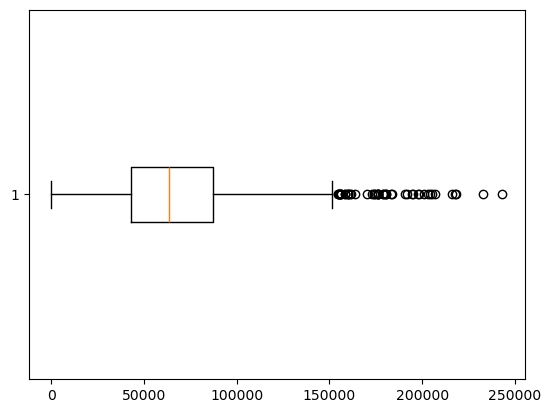

In [12]:
plt.boxplot(df['KM'],vert= False)
plt.show()

In [13]:
import numpy as np
q1=np.percentile(df['KM'],25)
q2=np.percentile(df['KM'],50)
q3=np.percentile(df['KM'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")


43000.0 63389.5 87020.75
IQR is 44020.75
upper whisker length is 153051.875
lower whisker length is -23031.125


In [14]:
len(df[df['KM']>uw])

49

In [15]:
df.loc[df['KM']>uw,'KM']=uw

C:\Users\andeb\AppData\Local\Temp\ipykernel_20444\1704636310.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['KM']>uw,'KM']=uw


In [16]:
len(df[df['KM']>uw])

0

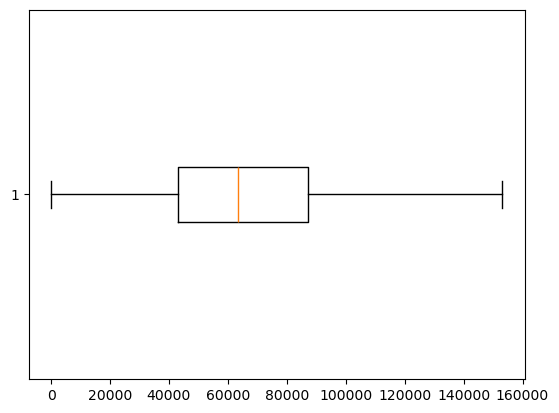

In [17]:
plt.boxplot(df['KM'],vert= False)
plt.show()

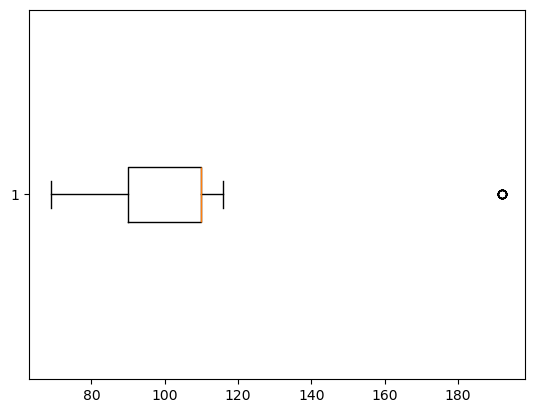

In [18]:
plt.boxplot(df['HP'],vert= False)
plt.show()

In [19]:
import numpy as np
q1=np.percentile(df['HP'],25)
q2=np.percentile(df['HP'],50)
q3=np.percentile(df['HP'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")

90.0 110.0 110.0
IQR is 20.0
upper whisker length is 140.0
lower whisker length is 60.0


In [20]:
len(df[df['HP']>uw])

11

In [21]:
df.loc[df['HP']>uw,'HP']=uw

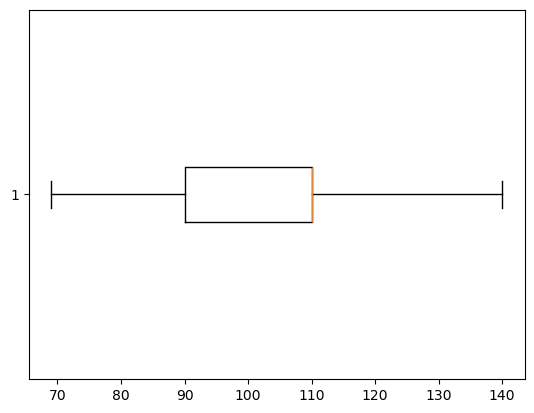

In [22]:
plt.boxplot(df['HP'],vert= False)
plt.show()

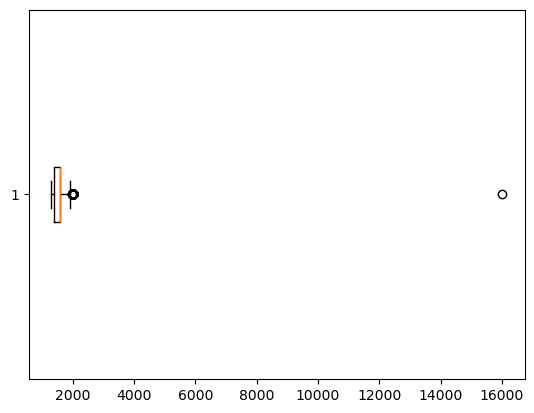

In [23]:
plt.boxplot(df['cc'],vert= False)
plt.show()

In [24]:
import numpy as np
q1=np.percentile(df['cc'],25)
q2=np.percentile(df['cc'],50)
q3=np.percentile(df['cc'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")

1400.0 1600.0 1600.0
IQR is 200.0
upper whisker length is 1900.0
lower whisker length is 1100.0


In [25]:
len(df[df['cc']>uw])

123

In [26]:
df.loc[df['cc']>uw,'cc']=uw

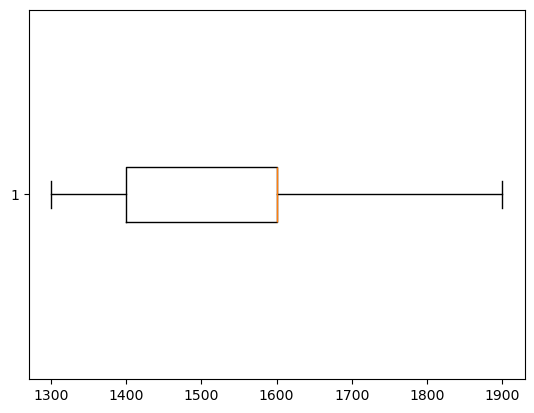

In [27]:
plt.boxplot(df['cc'],vert= False)
plt.show()

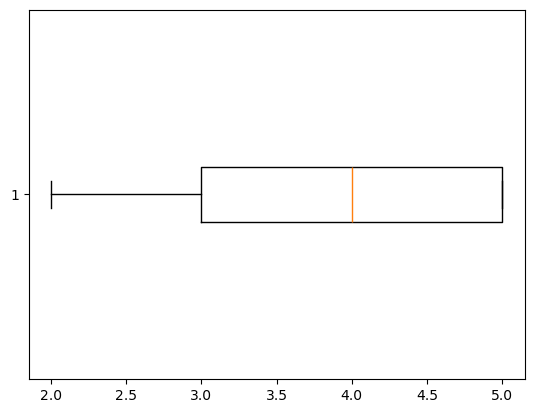

In [28]:
plt.boxplot(df['Doors'],vert= False)
plt.show()

In [29]:
# There are no outliers for Doors column

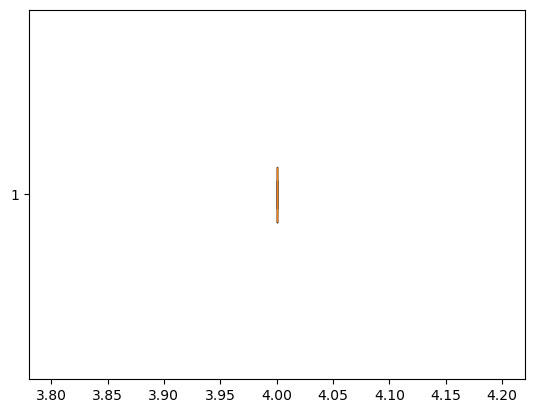

In [30]:
plt.boxplot(df['Cylinders'],vert= False)
plt.show()

In [31]:
# There are no outliers for Cylinders column

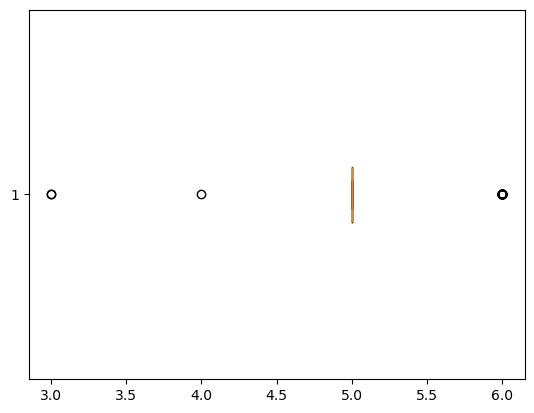

In [32]:
plt.boxplot(df['Gears'],vert= False)
plt.show()

In [33]:
import numpy as np
q1=np.percentile(df['Gears'],25)
q2=np.percentile(df['Gears'],50)
q3=np.percentile(df['Gears'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")

5.0 5.0 5.0
IQR is 0.0
upper whisker length is 5.0
lower whisker length is 5.0


In [34]:
len(df[df['Gears']>uw])

43

In [35]:
len(df[df['Gears']<lw])

3

In [36]:
df.loc[df['Gears']>uw,'Gears']=uw
df.loc[df['Gears']<lw,'Gears']=lw

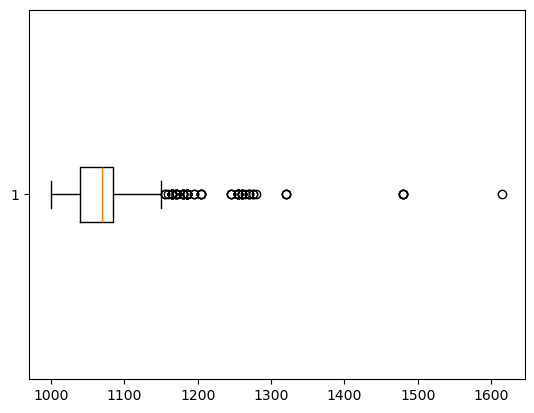

In [37]:
plt.boxplot(df['Weight'],vert= False)
plt.show()

In [38]:
import numpy as np
q1=np.percentile(df['Weight'],25)
q2=np.percentile(df['Weight'],50)
q3=np.percentile(df['Weight'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")

1040.0 1070.0 1085.0
IQR is 45.0
upper whisker length is 1152.5
lower whisker length is 972.5


In [39]:
len(df[df['Weight']>uw])

66

In [40]:
df.loc[df['Weight']>uw,'Weight']=uw

C:\Users\andeb\AppData\Local\Temp\ipykernel_20444\3857256722.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Weight']>uw,'Weight']=uw


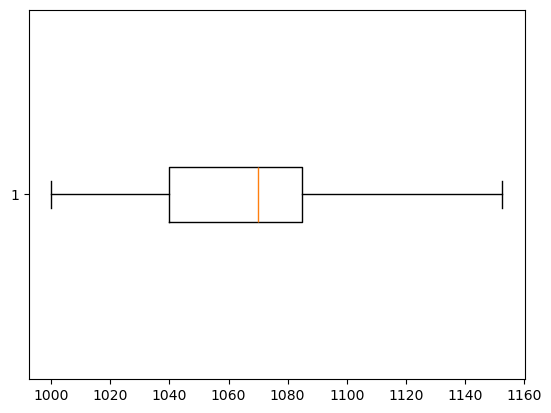

In [41]:
plt.boxplot(df['Weight'],vert= False)
plt.show()

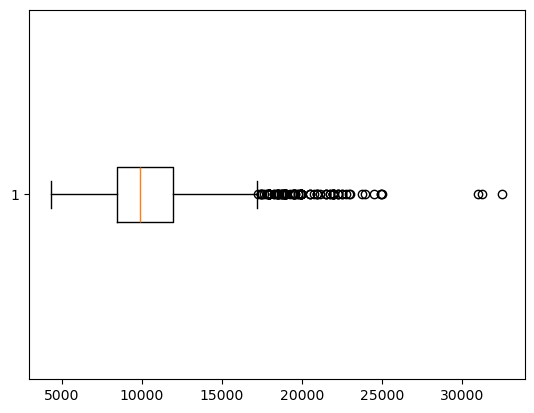

In [42]:
plt.boxplot(df['Price'],vert= False)
plt.show()

In [43]:
import numpy as np
q1=np.percentile(df['Price'],25)
q2=np.percentile(df['Price'],50)
q3=np.percentile(df['Price'],75)
iqr=q3-q1
print(q1,q2,q3)
print(f"IQR is {iqr}")
uw=q3+(iqr*1.5)
lw=q1-(iqr*1.5)
print(f"upper whisker length is {uw}")
print(f"lower whisker length is {lw}")

8450.0 9900.0 11950.0
IQR is 3500.0
upper whisker length is 17200.0
lower whisker length is 3200.0


In [44]:
len(df[df['Price']>uw])

110

In [45]:
df.loc[df['Price']>uw,'Price']=uw

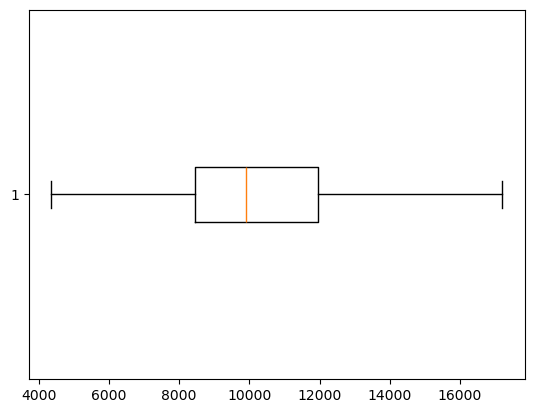

In [46]:
plt.boxplot(df['Price'],vert= False)
plt.show()

In [47]:
# now the outliers are removed from the data set and replaced with their nearest whisker length

In [48]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,1900,3,4,5,1152.5
1,13750,23,72937.0,Diesel,90,0,1900,3,4,5,1152.5
2,13950,24,41711.0,Diesel,90,0,1900,3,4,5,1152.5
3,14950,26,48000.0,Diesel,90,0,1900,3,4,5,1152.5
4,13750,30,38500.0,Diesel,90,0,1900,3,4,5,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,86,0,1300,3,4,5,1025.0
1432,10845,72,19000.0,Petrol,86,0,1300,3,4,5,1015.0
1433,8500,71,17016.0,Petrol,86,0,1300,3,4,5,1015.0
1434,7250,70,16916.0,Petrol,86,0,1300,3,4,5,1015.0


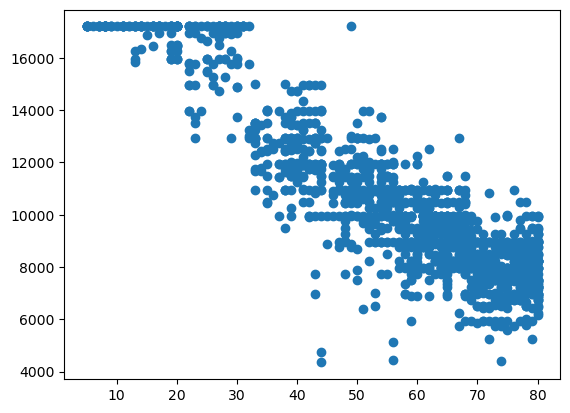

In [49]:
plt.scatter(x=df['Age_08_04'],y=df['Price'])
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age_08_04  1436 non-null   int64  
 2   KM         1436 non-null   float64
 3   Fuel_Type  1436 non-null   object 
 4   HP         1436 non-null   int64  
 5   Automatic  1436 non-null   int64  
 6   cc         1436 non-null   int64  
 7   Doors      1436 non-null   int64  
 8   Cylinders  1436 non-null   int64  
 9   Gears      1436 non-null   int64  
 10  Weight     1436 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 123.5+ KB


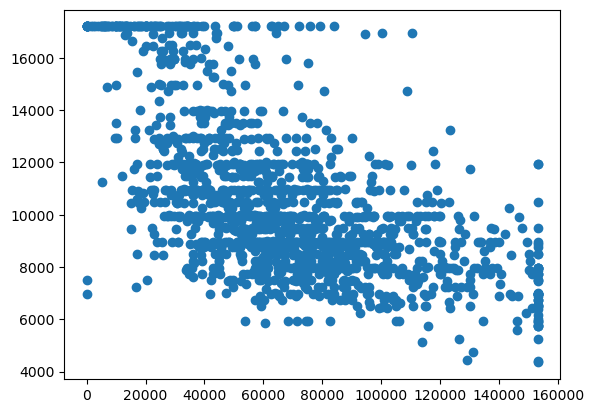

In [51]:
plt.scatter(x=df['KM'],y=df['Price'])
plt.show()

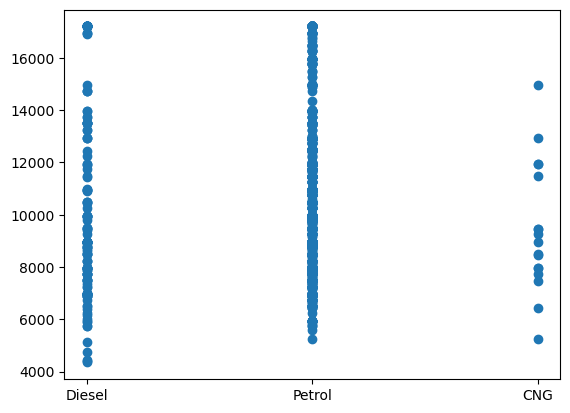

In [52]:
plt.scatter(x=df['Fuel_Type'],y=df['Price'])
plt.show()

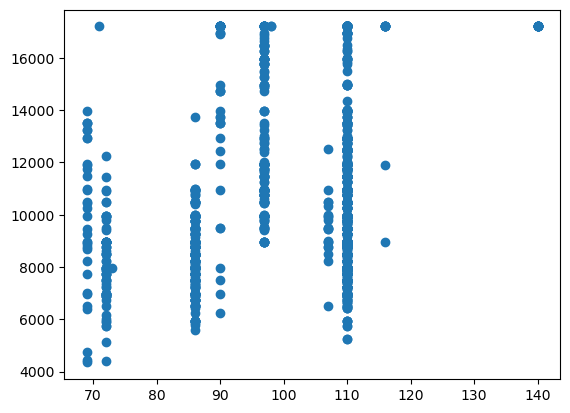

In [53]:
plt.scatter(x=df['HP'],y=df['Price'])
plt.show()

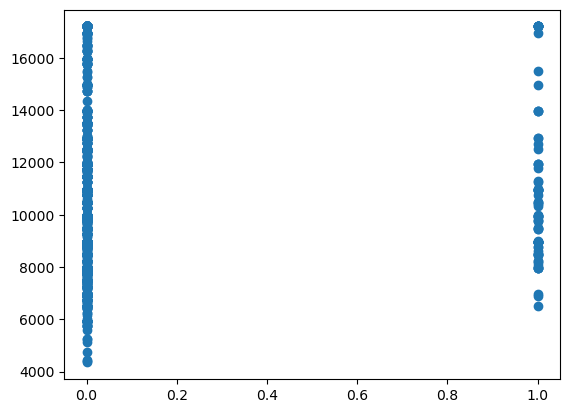

In [54]:
plt.scatter(x=df['Automatic'],y=df['Price'])
plt.show()

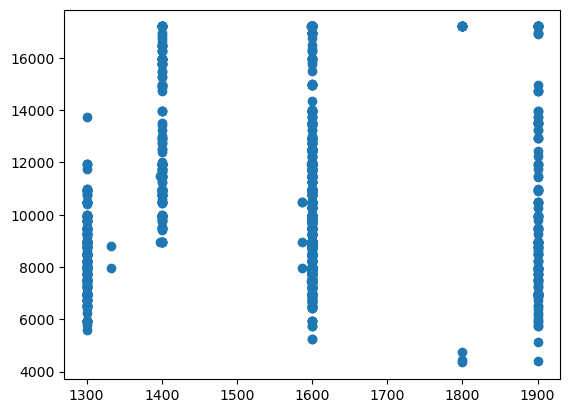

In [55]:
plt.scatter(x=df['cc'],y=df['Price'])
plt.show()

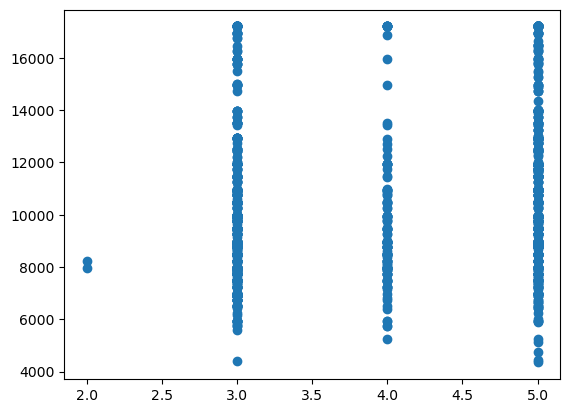

In [56]:
plt.scatter(x=df['Doors'],y=df['Price'])
plt.show()

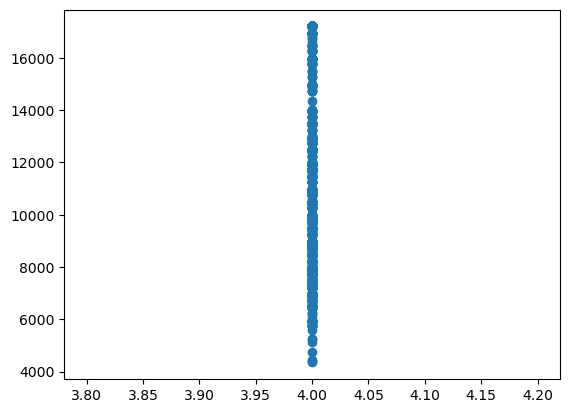

In [57]:
plt.scatter(x=df['Cylinders'],y=df['Price'])
plt.show()

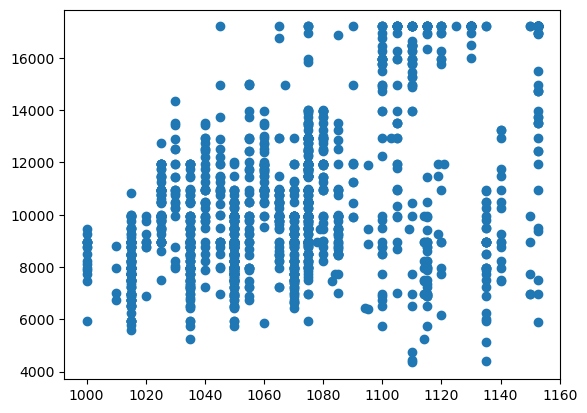

In [58]:
plt.scatter(x=df['Weight'],y=df['Price'])
plt.show()

In [59]:
# Data trasformation using Hot encoding

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
OHE=OneHotEncoder()

In [62]:
df1= OHE.fit_transform(df[['Fuel_Type']]).toarray()
df1= pd.DataFrame(df1,columns=OHE.get_feature_names_out(['Fuel_Type']))

In [63]:
df1

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [64]:
# concatenating the df and df1

In [65]:
df_encoded=pd.concat([df,df1],axis=1)
df_encoded

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,Diesel,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
1,13750,23,72937.0,Diesel,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
2,13950,24,41711.0,Diesel,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
3,14950,26,48000.0,Diesel,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
4,13750,30,38500.0,Diesel,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,86,0,1300,3,4,5,1025.0,0.0,0.0,1.0
1432,10845,72,19000.0,Petrol,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1433,8500,71,17016.0,Petrol,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1434,7250,70,16916.0,Petrol,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0


In [66]:
# now we have to drop the original Fuel_type column from the df_encoded table

In [67]:
df_encoded= df_encoded.drop(columns="Fuel_Type")

In [68]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   int64  
 1   Age_08_04         1436 non-null   int64  
 2   KM                1436 non-null   float64
 3   HP                1436 non-null   int64  
 4   Automatic         1436 non-null   int64  
 5   cc                1436 non-null   int64  
 6   Doors             1436 non-null   int64  
 7   Cylinders         1436 non-null   int64  
 8   Gears             1436 non-null   int64  
 9   Weight            1436 non-null   float64
 10  Fuel_Type_CNG     1436 non-null   float64
 11  Fuel_Type_Diesel  1436 non-null   float64
 12  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 146.0 KB


In [69]:
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
1,13750,23,72937.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
2,13950,24,41711.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
3,14950,26,48000.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
4,13750,30,38500.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,4,5,1025.0,0.0,0.0,1.0
1432,10845,72,19000.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1433,8500,71,17016.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1434,7250,70,16916.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0


In [70]:
df_encoded.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.895728,-0.608832,0.255640,0.035415,0.132106,0.184211,NaN,NaN,0.509536,-0.039638,0.002931,0.010402
Age_08_04,-0.895728,1.000000,0.531839,-0.131284,0.031619,-0.139771,-0.148137,NaN,NaN,-0.478225,0.002324,-0.097776,0.092666
KM,-0.608832,0.531839,1.000000,-0.330495,-0.081882,0.255855,-0.037677,NaN,NaN,-0.001489,0.143609,0.372325,-0.403652
HP,0.255640,-0.131284,-0.330495,1.000000,0.022339,0.099605,0.120844,NaN,NaN,0.026578,0.074088,-0.597310,0.546145
Automatic,0.035415,0.031619,-0.081882,0.022339,1.000000,-0.059519,-0.027654,NaN,NaN,0.090064,0.001486,-0.084490,0.080249
cc,0.132106,-0.139771,0.255855,0.099605,-0.059519,1.000000,0.139616,NaN,NaN,0.718655,0.026773,0.699151,-0.677068
Doors,0.184211,-0.148137,-0.037677,0.120844,-0.027654,0.139616,1.000000,NaN,NaN,0.381955,0.009680,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.509536,-0.478225,-0.001489,0.026578,0.090064,0.718655,0.381955,NaN,NaN,1.000000,0.084766,0.576489,-0.579163


In [71]:
# The column Price is having good postive realtionship with Weight column.
# The column Age_08_04 is having good postive realtionship with KM column.
#The column KM is having good postive realtionship Age_08_04 with column.
#The column HP is having good postive realtionship with Fuel_Type_Petrol column.
#The column cc is having good postive realtionship with Weight,Fuel_Type_Diesel columns.
#The column Weight is having good postive realtionship with Price,cc,Fuel_Type_Diesel columns.
#The column Fuel_Type_Dieselis having good postive realtionship with cc,Weight column.
#The column Fuel_Type_Petrol is having good postive realtionship with HP column.

In [130]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   int64  
 1   Age_08_04         1436 non-null   int64  
 2   KM                1436 non-null   float64
 3   HP                1436 non-null   int64  
 4   Automatic         1436 non-null   int64  
 5   cc                1436 non-null   int64  
 6   Doors             1436 non-null   int64  
 7   Cylinders         1436 non-null   int64  
 8   Gears             1436 non-null   int64  
 9   Weight            1436 non-null   float64
 10  Fuel_Type_CNG     1436 non-null   float64
 11  Fuel_Type_Diesel  1436 non-null   float64
 12  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 146.0 KB


In [134]:
X=df_encoded[df_encoded.columns[[9]]]
Y=df_encoded[df_encoded.columns[[0]]]

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=100)

In [136]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_test=ss.fit_transform(X_test)

In [139]:
#fitting the model with trainging data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(ss_X_train,Y_train)

LinearRegression()

In [140]:
Y_pred = model.predict(ss_X_train)

In [141]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [142]:
mse= mean_squared_error(Y_train,Y_pred)
print(f"mean squared error is {np.round(mse,2)}")

mean squared error is 6508887.59


In [143]:
import numpy as np
rmse= np.sqrt(mse)
print(f"root mean squared error is {np.round(rmse,2)}")

root mean squared error is 2551.25


In [144]:
score= r2_score(Y_train,Y_pred)
print(f"r2 score is {np.round(score,2)}")

r2 score is 0.27


In [ ]:
# When considering weight as high collinearity with price I got rmse as 2551.25 and r2 score as 0.27

In [ ]:
X=df_encoded[df_encoded.columns[[9,3]]]
Y=df_encoded[df_encoded.columns[[0]]]

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=100)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_test=ss.fit_transform(X_test)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(ss_X_train,Y_train)
Y_pred = model.predict(ss_X_train)
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
mse= mean_squared_error(Y_train,Y_pred)
print(f"mean squared error is {np.round(mse,2)}")
import numpy as np
rmse= np.sqrt(mse)
print(f"root mean squared error is {np.round(rmse,2)}")
score= r2_score(Y_train,Y_pred)
print(f"r2 score is {np.round(score,2)}")

mean squared error is 6508887.59
root mean squared error is 2551.25
r2 score is 0.27


In [ ]:
# Then  When considering weight and HP as high collinearity with price I got rmse as 2551.25 and r2 score as 0.27

In [72]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [73]:
#X=df_encoded.iloc[:,1:]
#Y=df_encoded[df_encoded.columns[[0]]]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=100)

In [75]:
# Now we apply standardization for our continous variables 

In [76]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_test=ss.fit_transform(X_test)

In [77]:
#3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [78]:
# Model1- Multiple linear regression

In [79]:
#fitting the model with trainging data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(ss_X_train,Y_train)

LinearRegression()

In [80]:
# predicting y variables

In [81]:
Y_pred = model.predict(ss_X_train)

In [82]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [83]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [84]:
mse= mean_squared_error(Y_train,Y_pred)
print(f"mean squared error is {np.round(mse,2)}")

mean squared error is 1161558.77


In [85]:
import numpy as np
rmse= np.sqrt(mse)
print(f"root mean squared error is {np.round(rmse,2)}")

root mean squared error is 1077.76


In [86]:
score= r2_score(Y_train,Y_pred)
print(f"r2 score is {np.round(score,2)}")

r2 score is 0.87


In [87]:
# finding mse,rmse and r2 score for testing data

In [88]:
Y_pred_test = model.predict(ss_X_test)

In [89]:
mse= mean_squared_error(Y_test,Y_pred_test)
print(f"mean squared error for test is {np.round(mse,2)}")

mean squared error for test is 1310672.72


In [90]:
import numpy as np
rmse= np.sqrt(mse)
print(f"root mean squared error for test is {np.round(rmse,2)}")

root mean squared error for test is 1144.85


In [91]:
score= r2_score(Y_test,Y_pred_test)
print(f"r2 score is {np.round(score,2)}")

r2 score is 0.85


In [92]:
# This model fitting good for this data set

In [93]:
coefficents= pd.DataFrame({
    "Column Names": X.columns,
    "Coefficent": model.coef_.ravel()
})
print(coefficents)

        Column Names   Coefficent
0          Age_08_04 -1940.237732
1                 KM  -511.086238
2                 HP   384.342867
3          Automatic    -0.995224
4                 cc  -458.299929
5              Doors   -91.809384
6          Cylinders     0.000000
7              Gears     0.000000
8             Weight   993.462086
9      Fuel_Type_CNG  -166.540349
10  Fuel_Type_Diesel     7.022407
11  Fuel_Type_Petrol    45.169147


In [94]:
# As the HP,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol increases the price also increases 

In [ ]:
#5.Apply Lasso and Ridge methods on the model.

In [99]:
#Model2- Lasso Regression

In [101]:
from sklearn.linear_model import Lasso
model1= Lasso(alpha=0.1)

In [103]:
#fitting the model with trainging data
model1.fit(ss_X_train,Y_train)

Lasso(alpha=0.1)

In [105]:
# predicting y variables
Y_pred_train= model1.predict(ss_X_train)

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(Y_train,Y_pred_train)
score= r2_score(Y_train,Y_pred_train)
rmse=np.sqrt(mse)
print(f"mean square error for training data is {round(mse,2)}")
print(f"root mean square error for training data is {round(rmse,2)}")
print(f"score for training data is {round(score,2)}")

mean square error for training data is 1161559.04
root mean square error for training data is 1077.76
score for training data is 0.87


In [108]:
Y_pred_test= model1.predict(ss_X_test)

In [109]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(Y_test,Y_pred_test)
score= r2_score(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print(f"mean square error for testing data is {round(mse,2)}")
print(f"root mean square error for testing data is {round(rmse,2)}")
print(f"score for testing data is {round(score,2)}")

mean square error for testing data is 1309429.88
root mean square error for testing data is 1144.3
score for testing data is 0.85


In [110]:
# This model is also a good model for predicting target variable

In [113]:
coefficents=pd.DataFrame({
    "Column names": X.columns,
    "coefficents": model1.coef_                                                 
})
coefficents

,Column names,coefficents
0,Age_08_04,-1940.442637
1,KM,-511.171503
2,HP,383.492095
3,Automatic,-0.792577
4,cc,-456.951129
5,Doors,-91.511533
6,Cylinders,0.000000
7,Gears,0.000000
8,Weight,992.685831
9,Fuel_Type_CNG,-178.979107


In [ ]:
# The features that are equal to zero are less significant and can be removed for model fitting

In [114]:
# Model3-Ridge Regression

In [115]:
from sklearn.linear_model import Ridge
model2= Ridge(alpha=0.1)

In [117]:
# fitting the model
model2.fit(ss_X_train,Y_train)

Ridge(alpha=0.1)

In [119]:
# predicting the y variables
Y_predict_train= model2.predict(ss_X_train)

In [122]:
# finding the metrics
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(Y_predict_train,Y_train)
rmse= np.sqrt(mse)
score= r2_score(Y_predict_train,Y_train)
print(f"mean squared error for training data is {round(mse,2)}")
print(f"root mean squared error for training data is {round(rmse,2)}")
print(f"r2 score for training data is {round(score,2)}")

mean squared error for training data is 1161558.85
root mean squared error for training data is 1077.76
r2 score for training data is 0.85


In [124]:
# predicting the y variables
Y_predict_test= model2.predict(ss_X_test)

In [125]:
# finding the metrics
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(Y_predict_test,Y_test)
rmse= np.sqrt(mse)
score= r2_score(Y_predict_test,Y_test)
print(f"mean squared error for testing data is {round(mse,2)}")
print(f"root mean squared error for testing data is {round(rmse,2)}")
print(f"r2 score for testing data is {round(score,2)}")

mean squared error for testing data is 1310665.93
root mean squared error for testing data is 1144.84
r2 score for testing data is 0.82


In [126]:
oefficents=pd.DataFrame({
    "Column names": X.columns,
    "coefficents": model2.coef_                                                 
})
coefficents

,Column names,coefficents
0,Age_08_04,-1940.442637
1,KM,-511.171503
2,HP,383.492095
3,Automatic,-0.792577
4,cc,-456.951129
5,Doors,-91.511533
6,Cylinders,0.000000
7,Gears,0.000000
8,Weight,992.685831
9,Fuel_Type_CNG,-178.979107


In [127]:
# This model is also good for predicting the y variables

In [128]:
#Interview Questions:
#1.What is Normalization & Standardization and how is it helpful?
# Standardization means it converts the continous variables which has units into unit less and gives the values between -3 to +3.
# Normalization means is same as the Standardization but gives the values between 0 to 1. 
# Both does the data transformation for making further process easy.
# Main object of both is to convert units into unitless because each variable has different units in the given data set.

In [129]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
# To address multicollinearity in multiple linear regression we find Variance Inflation Factor(VIF) ,so that we can detect the multicollinearity 
#issues between the X and Y variables.
#VIF=1/(1-r2_score)